```bash
.
├── Documentation
│   └── PythonCodeDocumentation.pdf
├── Functions
│   ├── add_truncated_region_to_mesh.py
│   ├── Checkvalid.py
│   ├── count_prismatic_elements.py
│   ├── FullSolvers.py
│   ├── MeshCreation.py
│   ├── ML_MPT_Predictor.py
│   ├── MPTFunctions.py
│   ├── MultiPermeability.py
│   ├── PlotEditor.py
│   ├── PlotEditorWithErrorBars.py
│   ├── Plotters.py
│   ├── PODFunctions.py
│   ├── PODPlotEditor.py
│   ├── PODPlotEditorWithErrorBars.py
│   ├── PODSolvers.py
│   ├── ResultsFunctions.py
│   ├── SingleSolve.py
│   └── step_to_vol_mesher.py
├── GeoFiles
│   ├── Claw_wodden_handle.geo
│   ├── Coin.geo
│   ├── Cylinder.geo
│   ├── DualBar.geo
│   ├── dualBox.geo
│   └── ...
├── OCC_Geometry
│   ├── OCC_bottle.py
│   ├── OCC_cylinder.py
│   ├── OCC_dualbar.py
│   ├── OCC_sphere.py
│   └── ...
├── Results
│   └── sphere
|       └── al_0.01_mu_1_sig_1e6
|           └── 1e1-1e5_40_el_57698_ord_2
|               ├── Data
|               |   └── ...
|               ├── Functions
|               |   └── ...
|               ├── Graphs
|               |   └── ...
|               ├── Input_files
|               |   └── ...
|               ├── PlotEditor.py
|               └── PlotterSettings.py
├── Results_2d
│   ├── PlotterSettings.py
├── Settings
│   ├── PlotterSettings.py
│   └── Settings.py
├── VolFiles
│   ├── Claw_wodden_handle.vol
│   ├── Knife_Cheap_Chef.vol
│   ├── OCC_cylinder.vol
│   ├── OCC_dualbar.vol
│   ├── OCC_sphere.vol
│   └── ...
├── Changelog_for_MPT-Calculator
├── __init__.py
├── LICENSE
├── main_2d.py
├── runner.py
├── README.md

```


## First Example:

First, we need to navigate to the project root directory. To check use:

In [1]:
import os
os.getcwd()

'/home/james/Desktop/Updated_MPT_Calculator/MPT-Calculator/tutorials'

and to set:

In [2]:
root_dir = os.path.dirname(os.getcwd())
os.chdir(root_dir)
os.getcwd()

'/home/james/Desktop/Updated_MPT_Calculator/MPT-Calculator'

We now need to import the main function. $\texttt{runner.py}$ contains the starting point for MPT-Calculator. 

In [3]:
from runner import main
from time import time

importing NGSolve-6.2.2204


$\texttt{main}$ is a function taking variable input arguments for controlling the mesh size, order, geometry model, exciting frequencies, and alpha:
```python
main(h=2, order=2, curve_degree=5, start_stop=(), alpha='', geometry='default', frequency_array='default', use_OCC=False,
         use_POD=False, use_parallel=True)
```
These will be explained in detail later. For now, lets run the default settings.

|  |   |   |   |   |
|---------------------------------------------|---|---|---|---|
|$\texttt{Geometry} = \texttt{'sphere.geo'}$  |$\texttt{Start = 1}$       |
|$\texttt{alpha = 1e-3}$                      |$\texttt{Finish = 8}$      |   
|$\texttt{h = 2}$                             |$\texttt{Points = 40}$     |
|$\texttt{Order = 2}$                         |$\texttt{Single = False}$  |
|$\texttt{Pod = False}$   |$\texttt{MultiProcessing = True}$    |

sphere.geo
importing NGSolve-6.2.2204
optfile ./ng.opt does not exist - using default values
togl-version : 2
OCC module loaded
loading ngsolve library
NGSolve-6.2.2204
Using Lapack
Including sparse direct solver Pardiso
Running parallel using 12 thread(s)
 Calc Triangle Approximation
Thank you for using NGSolve
load -geofile=GeoFiles/sphere.geo
 mesh contains 9814 elements
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
 solved theta0 problems    
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
Frequency Sweep complete 


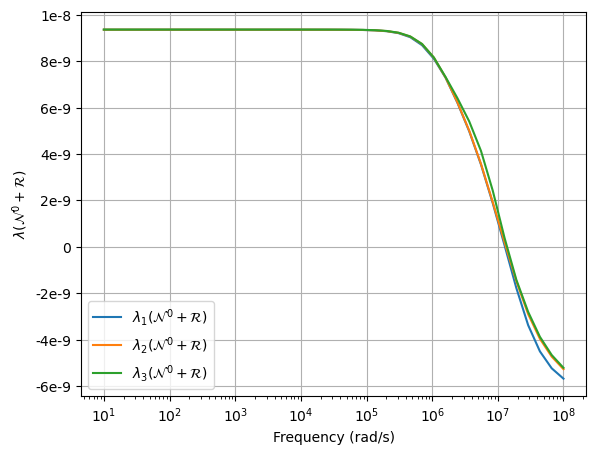

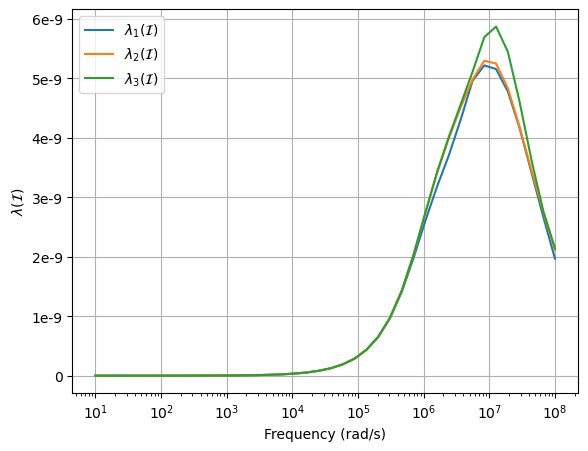

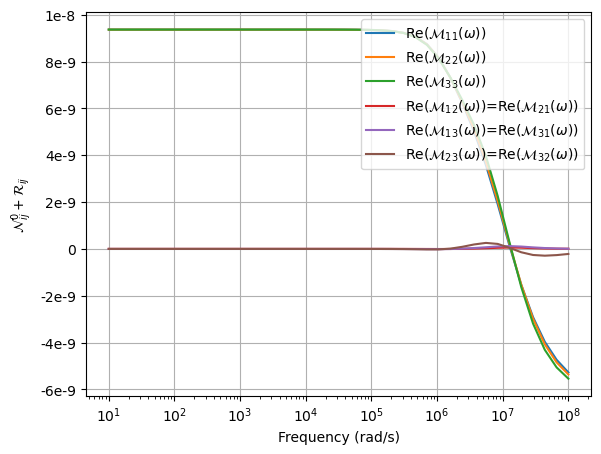

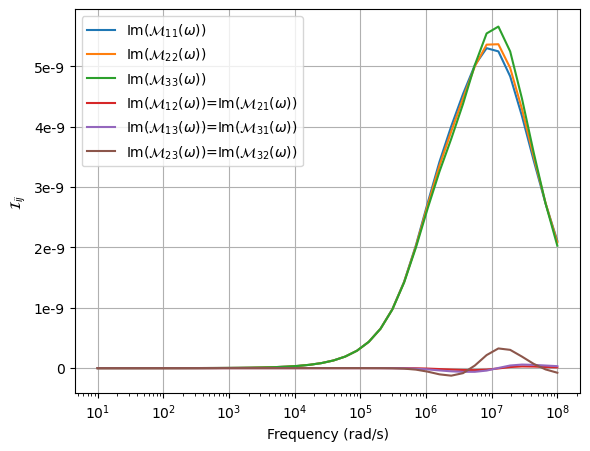

In [4]:
start_time = time();
main(use_OCC=True);
stop_time = time();

In [5]:
print(f'Total time = {(stop_time - start_time)/60} minutes')

Total time = 1.631082820892334 minutes


We have ran a simulation using the default values of MPT-Calculator. This uses a unit sphere, scaled by $\alpha=10^{-3}$, as the object, discretised using a coarse mesh and order $p=2$ elements.

This is repeated for each frequency over the range of 10 to $10^8$ rad/s in 40 logarithmically spaced samples.

### Saving Results

The output of the simulation, including any figures are saved in the 'Results' folder.

For example: 
```bash
MPT-Calculator/Results/sphere/al_0.001_mu_1_sig_1e6/1e1-1e8_40_el_9814_ord_2/
```

The results folder will contain a copy of the input files used for the simulation, including the mesh, .geo file, and a copy of the main function. This is so that the results can be recreated.

### Returning Values

Unlike the original MPT-Calculator, the new version allows the user to return variables from main.

```python
TensorArray, EigenValues, N0, Elements, Array, Ndofs, EddyCurrentTest = main()
```
 - $\texttt{TensorArray}$ is a complex Nx9 array containing each of the tensor coefficients for the 3x3 rank 2 MPT for each frequency of interest.
 - $\texttt{EigenValues}$ is a Nx3 array containing the eigenvalues for each frequency.
 - $\texttt{N0}$ is the 3x3 $\mathcal{N}^0$ coefficients.
 - $\texttt{Elements}$ is the integer number of elements in the mesh.
 - $\texttt{Array}$ is the Nx1 array containing the frequencies used for the sweep.
 - $\texttt{Ndofs}$ is a tuple containing the number of degrees of freedom used for the $\boldsymbol{\theta}^{(0)}$ and $\boldsymbol{\theta}^{(1)}$ finite element spaces.
 - $\texttt{EddyCurrentTest}$ will contain an estimated max frequency where the eddy current model holds if ```EddyCurentTest``` is set to True in ```Settings.py```. Otherwise it will return False.

This is to make it easier to integrate the $\texttt{MPT-Calculator}$ into other codebases.

sphere.geo
importing NGSolve-6.2.2204
optfile ./ng.opt does not exist - using default values
togl-version : 2
OCC module loaded
loading ngsolve library
NGSolve-6.2.2204
Using Lapack
Including sparse direct solver Pardiso
Running parallel using 12 thread(s)
 Calc Triangle Approximation
Thank you for using NGSolve
load -geofile=GeoFiles/sphere.geo
 mesh contains 9814 elements
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
 solved theta0 problems    
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
Frequency Sweep complete 


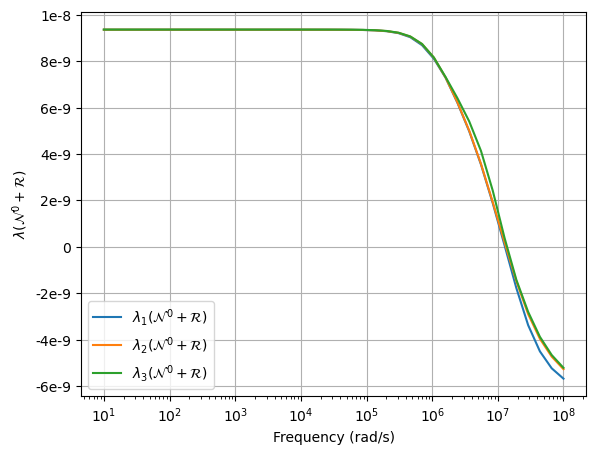

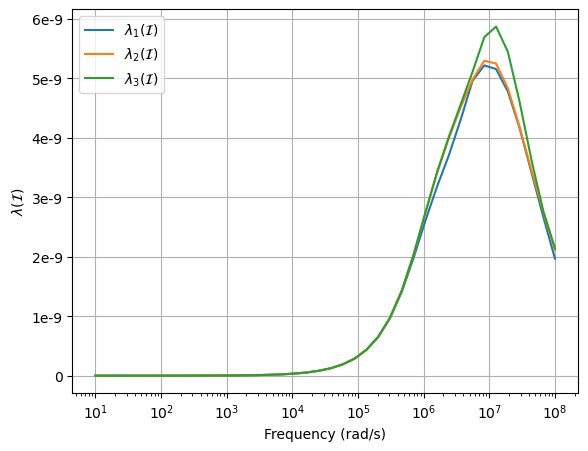

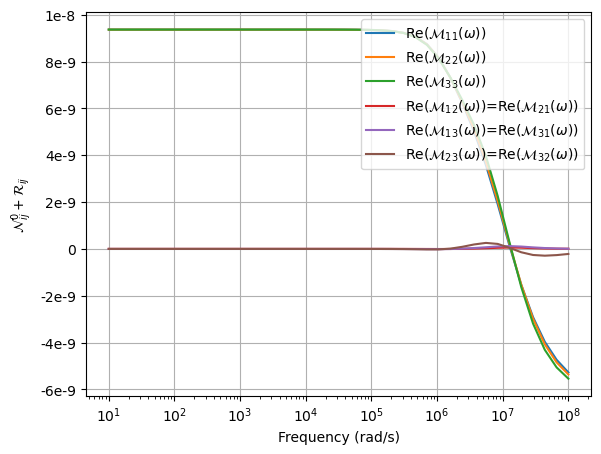

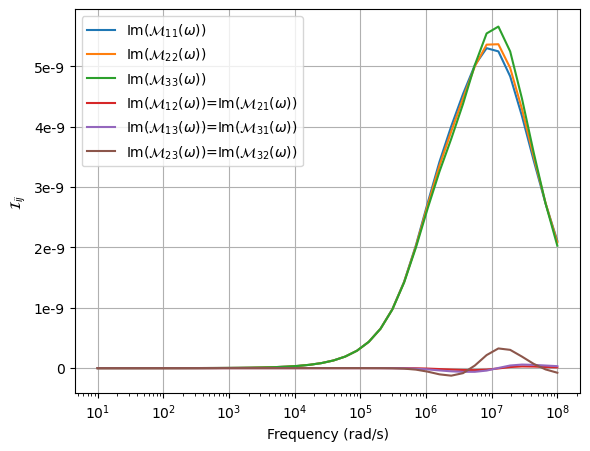

In [6]:
TensorArray, EigenValues, N0, Elements, Array, Ndofs, EddyCurrentTest = main()